In [10]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

# Practice Activity 7.2 - Penalized Regression
### Part 1
Make a pipeline that uses all the variables in the Ames dataset, and then fits Ridge Regression with λ = 1.

Cross-validate this pipeline and compare the results to the ordinary linear regression.

Then fit the model on the whole dataset and get the coefficients. Make a plot of these coefficients compared to the ones from ordinary linear regression.

In [11]:
ames = pd.read_csv("C:/Users/alexa/OneDrive/Documentos/VSCode Folder/GSB544_Computing_and_ML/Data/In Class Data/AmesHousing.csv")

# Get rid of columns with mostly NaN values
good_cols = ames.isna().sum() < 100
ames = ames.loc[:,good_cols]

# Drop other NAs
ames = ames.dropna()
ames


,2Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,7937,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,8885,Pave,IR1,Low,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,10010,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [13]:
# OLS model  
X = ames.drop(["SalePrice", "2Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ols", LinearRegression())]
)

scores = cross_val_score(lr_pipeline_1, X, y, cv = 5, scoring = 'r2')
ols_mean_r2 = scores.mean()
print("OLS R-squared:", ols_mean_r2)

OLS R-squared: -2.3568608654971143e+21


In [20]:
# Linear regression coefficients
lr_pipeline_1.fit(X, y)

lr_coefs = lr_pipeline_1.named_steps["ols"].coef_

print("Linear coefficients:", lr_coefs)

Linear coefficients: [-5.13424107e+16 -5.13424107e+16 -5.13424107e+16 -5.13424107e+16
 -5.13424107e+16 -5.13424107e+16  2.51106254e+16  2.51106254e+16
  1.55993032e+17  1.55993032e+17  1.55993032e+17  1.55993032e+17
 -2.22497459e+17 -2.22497459e+17 -2.22497459e+17 -2.22497459e+17
 -1.40190448e+16 -1.40190448e+16 -1.40190448e+16  5.50106959e+16
  5.50106959e+16  5.50106959e+16  5.50106959e+16  5.50106959e+16
 -7.73964294e+16 -7.73964294e+16 -7.73964294e+16 -3.15644662e+15
 -3.15644662e+15 -3.15644662e+15 -3.15644662e+15 -3.15644662e+15
 -3.15644662e+15 -3.15644662e+15 -3.15644662e+15 -3.15644662e+15
 -3.15644662e+15 -3.15644662e+15 -3.15644662e+15 -3.15644662e+15
 -3.15644662e+15 -3.15644662e+15 -3.15644662e+15 -3.15644662e+15
 -3.15644662e+15 -3.15644662e+15 -3.15644662e+15 -3.15644662e+15
 -3.15644662e+15 -3.15644662e+15 -3.15644662e+15 -3.15644662e+15
 -3.15644662e+15 -3.15644662e+15 -3.15644662e+15  4.18798057e+15
  4.18798057e+15  4.18798057e+15  4.18798057e+15  4.18798057e+15
  4.

In [16]:
# Ridge Regression with λ = 1
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_2 = Pipeline(
  [("preprocessing", ct),
   ("ridge", Ridge(alpha = 1.0))]
)

scores = cross_val_score(lr_pipeline_2, X, y, cv = 5, scoring = 'r2')
ridge_mean_r2 = scores.mean()
print("Ridge R-squared:", ridge_mean_r2)

Ridge R-squared: 0.8619316345217334


In [ ]:
# Ridge regression coefficients
lr_pipeline_2.fit(X, y)

ridge_coefs = lr_pipeline_2.named_steps["ridge"].coef_

print("Ridge coefficients:", ridge_coefs)

array([-5.58514707e+03,  1.27959973e+03, -5.46571776e+03,  7.87614164e+03,
        3.04609538e+03, -1.15097192e+03, -9.33396395e+03,  9.33396395e+03,
        1.22549207e+03,  7.29888520e+03, -1.08647168e+04,  2.34033949e+03,
       -8.75436678e+03,  9.01003491e+03, -3.97712861e+03,  3.72146049e+03,
        9.41980874e+03, -8.79255885e+03, -6.27249885e+02,  8.17535896e+02,
        8.01641445e+03, -5.69763865e+03, -3.98756032e+03,  8.51248627e+02,
        8.79698364e+02,  7.61644748e+03, -8.49614584e+03, -3.15970613e+03,
        4.27236551e+03,  7.88847839e+03, -5.86113592e+03, -9.15806934e+03,
       -1.14550380e+04,  6.03134279e+03, -2.05039767e+04, -1.35486631e+04,
        5.21751589e+03,  6.65306858e+04, -1.21001139e+04, -2.25857464e+03,
        8.65313918e+02, -1.52143284e+04, -1.58503469e+04,  9.55308503e+03,
       -1.82636881e+04,  2.78380350e+04,  2.24166992e+04, -1.59147424e+04,
       -1.30475803e+04, -1.14575200e+04, -1.24710470e+04,  1.07458866e+04,
        3.69996740e+04, -

In [25]:
combined_coefs = np.concatenate([lr_coefs, ridge_coefs])
model_type = ["linear"] * len(lr_coefs) + ["ridge"] * len(ridge_coefs)

# Create DataFrame
coefs_df = pd.DataFrame({
    "Coefficient": combined_coefs,
    "Model": model_type
})

print(coefs_df)

      Coefficient   Model
0   -5.134241e+16  linear
1   -5.134241e+16  linear
2   -5.134241e+16  linear
3   -5.134241e+16  linear
4   -5.134241e+16  linear
..            ...     ...
503  2.913671e+03   ridge
504  1.415146e+03   ridge
505 -4.409406e+03   ridge
506 -7.247969e+02   ridge
507 -8.410758e+02   ridge

[508 rows x 2 columns]


C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 229 rows containing missing values.


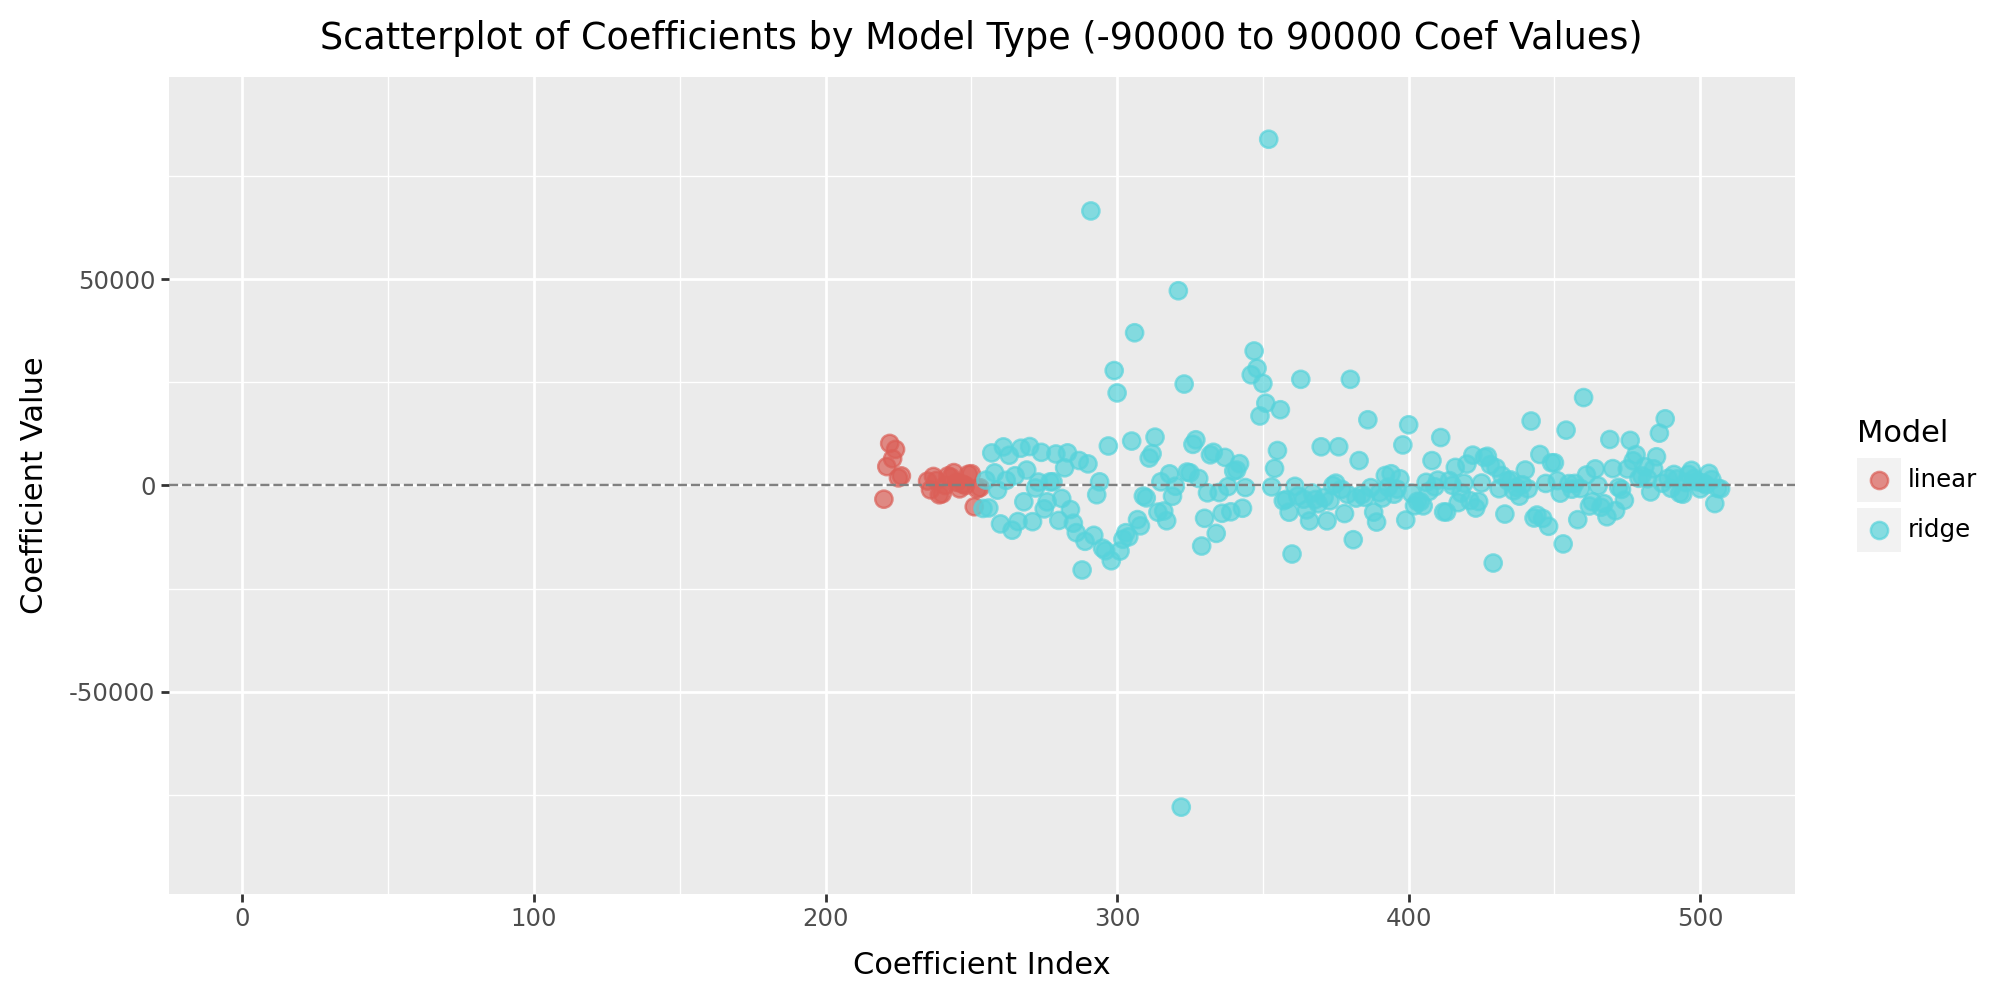

In [92]:
(
    ggplot(coefs_df, aes(x='Index', y='Coefficient', color='Model'))
    + geom_point(size=3, alpha=0.7)  # Scatter points for each coefficient
    + geom_hline(yintercept=0, linetype="dashed", color="gray")  # Add reference line at y=0
    + labs(title="Scatterplot of Coefficients by Model Type (-90000 to 90000 Coef Values)",
           y="Coefficient Value",
           x="Coefficient Index")
    + scale_y_continuous(limits=(-90000, 90000))
    + theme(figure_size = (10,5))
)

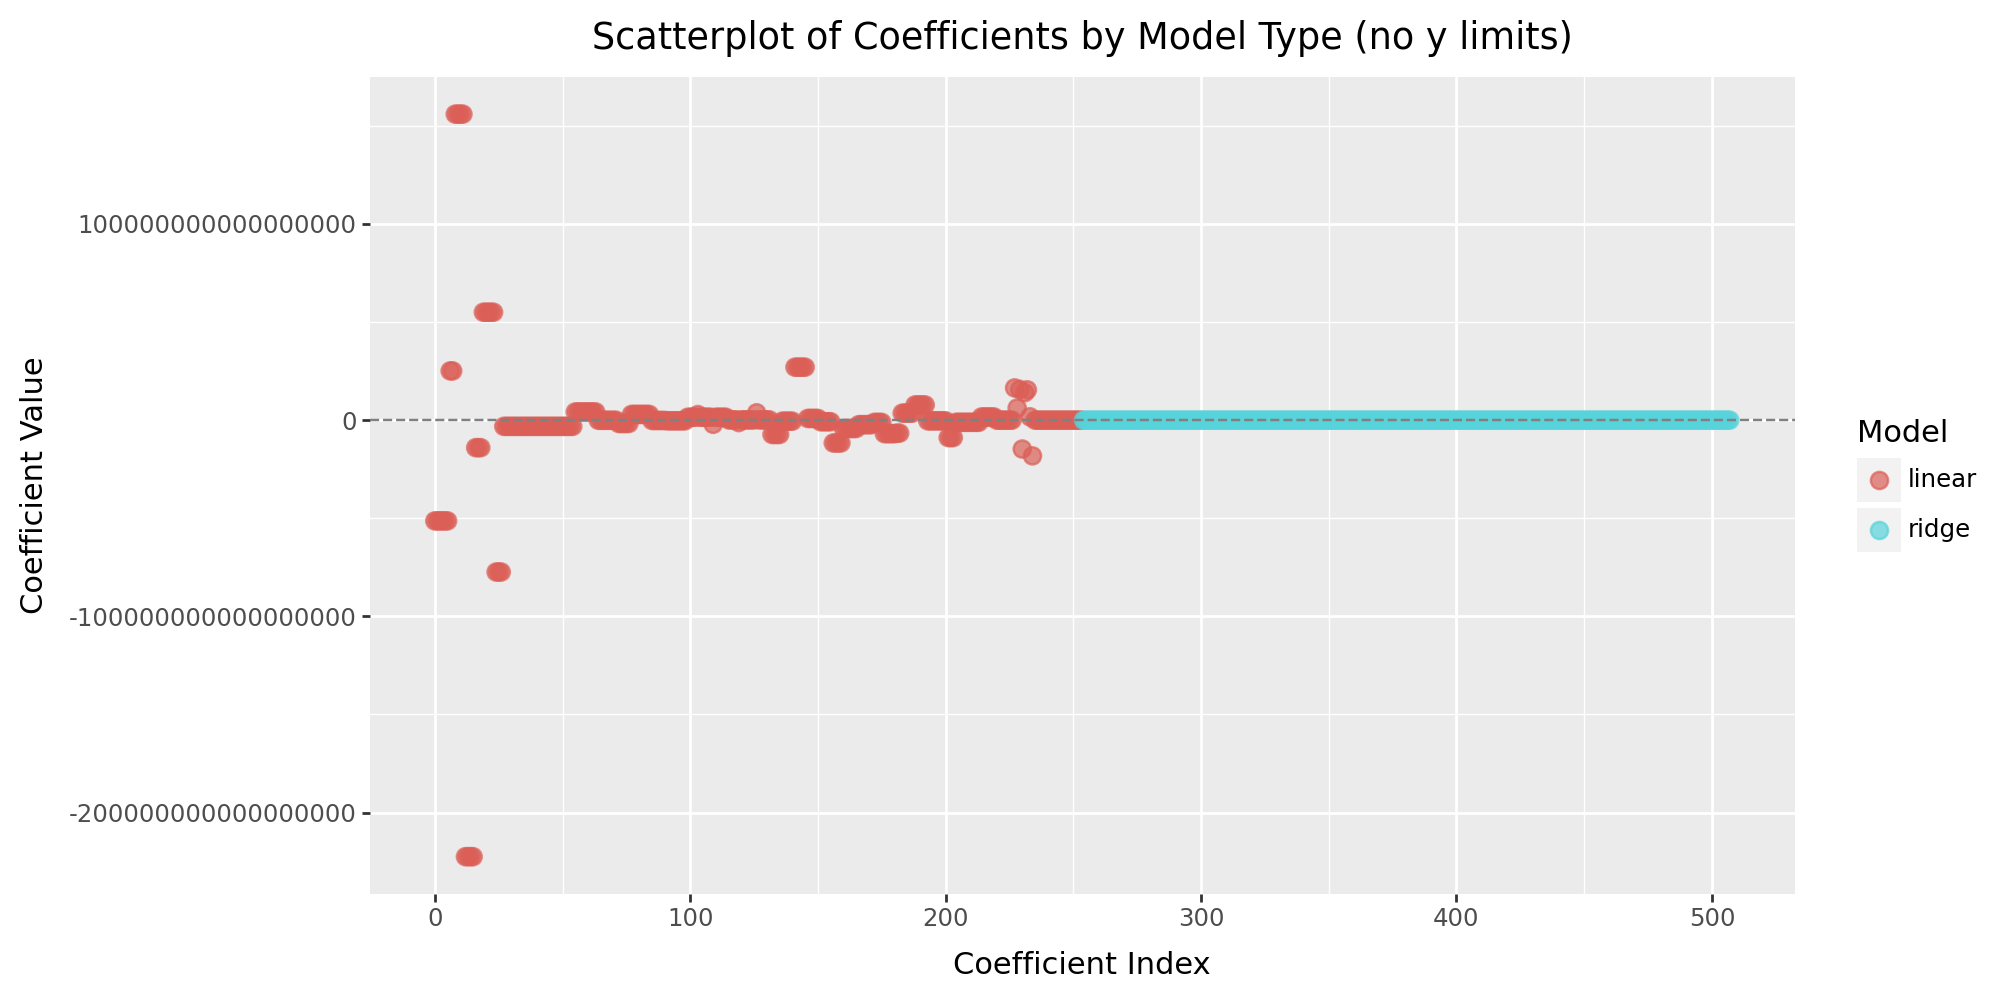

In [ ]:
from plotnine import *

coefs_df['Index'] = np.arange(len(coefs_df))

coefs_df

(
    ggplot(coefs_df, aes(x='Index', y='Coefficient', color='Model'))
    + geom_point(size=3, alpha=0.7)  # Scatter points for each coefficient
    + geom_hline(yintercept=0, linetype="dashed", color="gray")  # Add reference line at y=0
    + labs(title="Scatterplot of Coefficients by Model Type (no y limits)",
           y="Coefficient Value",
           x="Coefficient Index")
    + theme(figure_size = (10,5))
)


We can see from these two plots that the linear model has a larger range of coefficients with some values being less than -2.2249745909432682e+17. The ridge coefficients are generally between a range of 5000 and -5000, with a few values outside. Overall, the ridge coefficients are much less extreme than the linear coefficients which makes sense since we are restricting the linear coefficients and having more SSE.

### Part 2

Using the same pipeline as previously, perform tuning on λ.

You should always try λ values on a log scale; that is, don’t use [1,2,3,4]; instead use something like [0.001, 0.01, 0.1, 1, 10]

In [93]:
from sklearn.model_selection import GridSearchCV

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_2 = Pipeline(
  [("preprocessing", ct),
   ("ridge", Ridge())]
)

alphas = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

gscv = GridSearchCV(lr_pipeline_2, alphas, cv = 5, scoring='r2')

gscv_fitted = gscv.fit(X, y)

cv_results = gscv_fitted.cv_results_

results_df = pd.DataFrame({
    "alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "mean_r2": cv_results['mean_test_score']
})

print(results_df)


      alpha   mean_r2
0     0.001  0.853920
1     0.010  0.854186
2     0.100  0.856302
3     1.000  0.861932
4    10.000  0.864272
5   100.000  0.857773
6  1000.000  0.833027


The best alpha on the logarithmic scale is 10 according to the above data frame.

### Part 3 

Create a LASSO pipeline, and tune λ.

Fit your best model on the full Ames data, and compare the coefficients to Ridge and OLS.

In [96]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_3 = Pipeline(
  [("preprocessing", ct),
   ("lasso", Lasso())]
)

alphas = {'lasso__alpha': [0.1, 1, 10, 100, 1000]}

gscv = GridSearchCV(lr_pipeline_3, alphas, cv = 5, scoring='r2')

gscv_fitted = gscv.fit(X, y)

cv_results = gscv_fitted.cv_results_

results_df = pd.DataFrame({
    "alpha": [0.1, 1, 10, 100, 1000],
    "mean_r2": cv_results['mean_test_score']
})

print(results_df)

C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.236e+11, tolerance: 1.348e+09
C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.570e+11, tolerance: 1.474e+09
C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: Co

    alpha   mean_r2
0     0.1  0.856618
1     1.0  0.857152
2    10.0  0.860632
3   100.0  0.866931
4  1000.0  0.839721


For the lasso model, the best alpha is 100.

In [109]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_3 = Pipeline(
  [("preprocessing", ct),
   ("lasso", Lasso(alpha = 100))]
)

lr_pipeline_3.fit(X, y)

lasso_coefs = lr_pipeline_3.named_steps["lasso"].coef_

print("Lasso coefficients:", lasso_coefs)

Lasso coefficients: [-0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.40179046e+03 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  2.91561103e+03 -0.00000000e+00  0.00000000e+00
 -1.02299521e+04  5.27128450e+03 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  5.35462663e+03 -2.63928711e+03 -0.00000000e+00  1.77446540e+02
 -0.00000000e+00  2.11317738e+03 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.14107952e+03  0.00000000e+00
 -0.00000000e+00  1.41381624e+04 -7.39480667e+03 -1.20939271e+03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -6.88307419e+02 -3.10766828e+03  0.00000000e+00
 -4.43798790e+03  3.63801042e+04  2.61893814e+04 -2.59146809e+03
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  1.40936035e+04
  3.79963928e+04  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -5.26116157e+02  6.18676252e+03  0.00000000e+00  0.00000000e+00
 -0.0

In [103]:
combined_coefs = np.concatenate([lr_coefs, ridge_coefs, lasso_coefs])
model_type = ["linear"] * len(lr_coefs) + ["ridge"] * len(ridge_coefs) + ["lasso"] * len(lasso_coefs)

coefs_df = pd.DataFrame({
    "Coefficient": combined_coefs,
    "Model": model_type
})

coefs_df['Index'] = np.arange(len(coefs_df))


print(coefs_df)


      Coefficient   Model  Index
0   -5.134241e+16  linear      0
1   -5.134241e+16  linear      1
2   -5.134241e+16  linear      2
3   -5.134241e+16  linear      3
4   -5.134241e+16  linear      4
..            ...     ...    ...
757  2.829886e+03   lasso    757
758  7.919153e+02   lasso    758
759 -4.328444e+03   lasso    759
760 -5.760529e+02   lasso    760
761 -7.673726e+02   lasso    761

[762 rows x 3 columns]


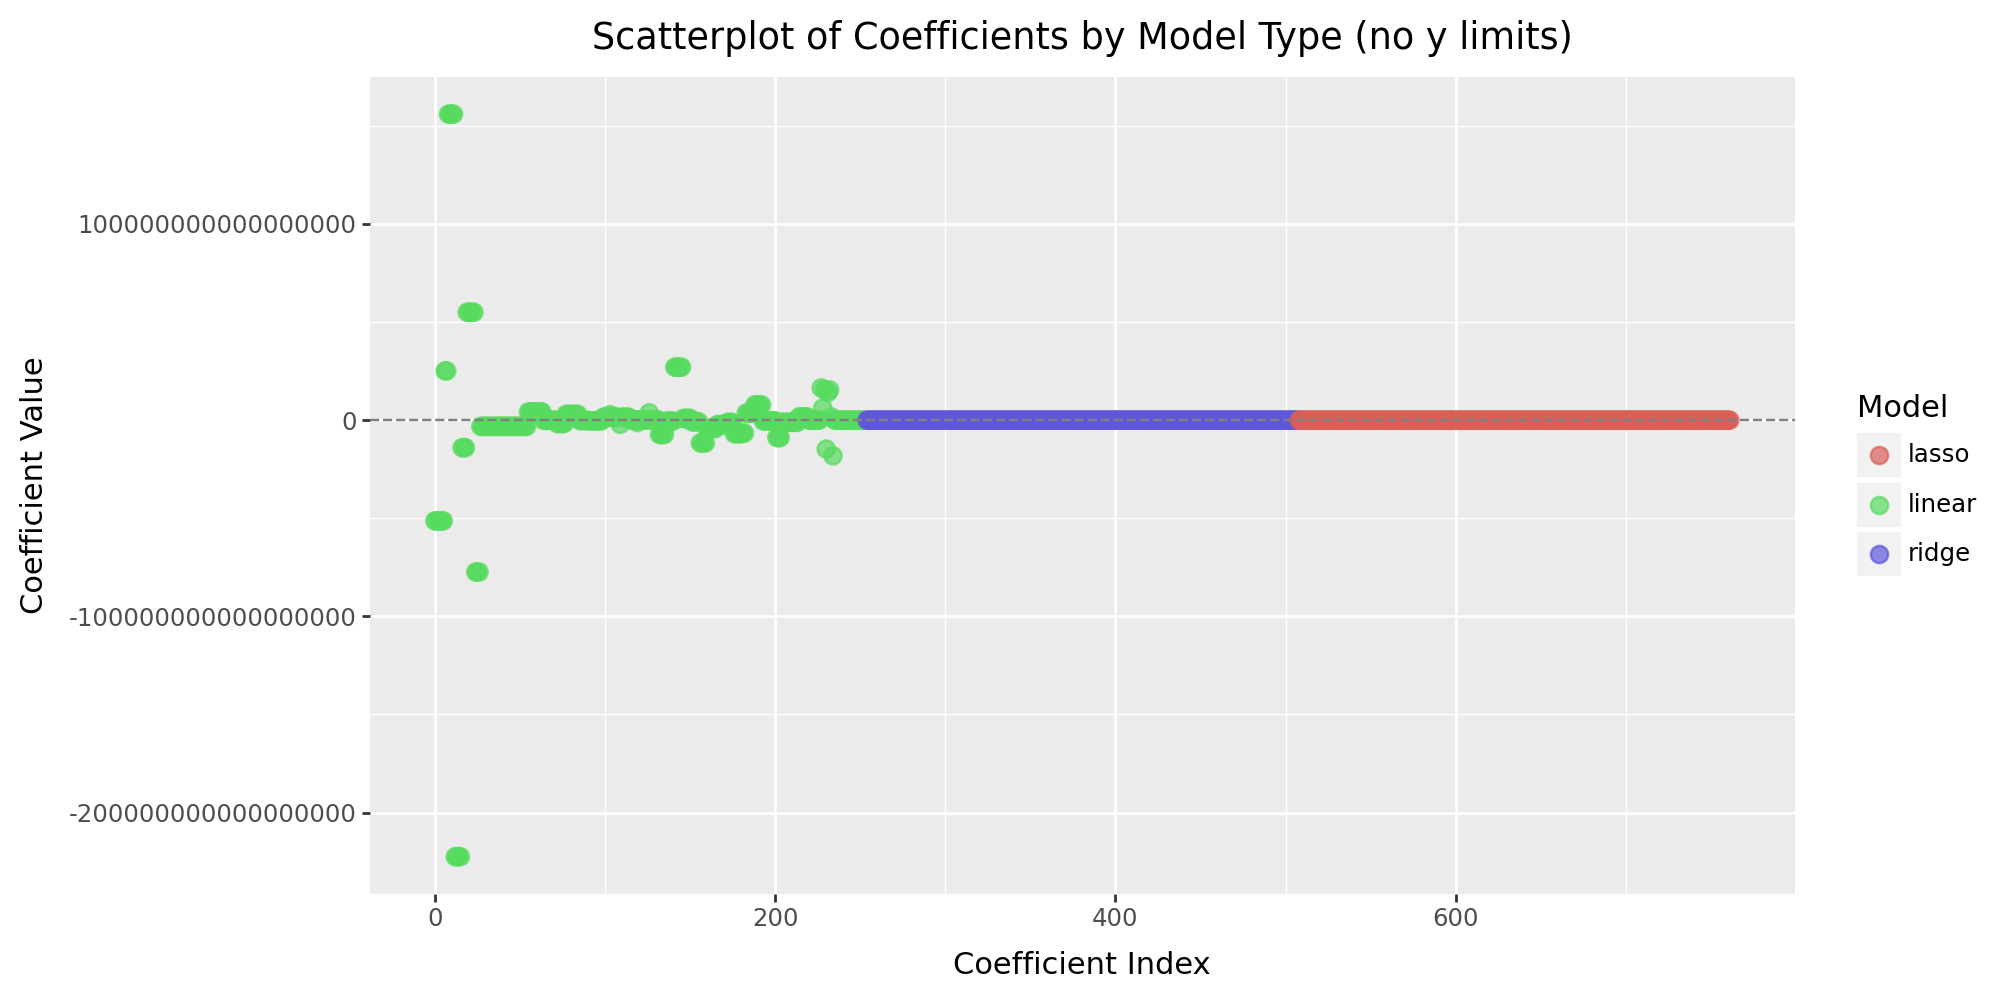

In [110]:
(
    ggplot(coefs_df, aes(x='Index', y='Coefficient', color='Model'))
    + geom_point(size=3, alpha=0.7)  # Scatter points for each coefficient
    + geom_hline(yintercept=0, linetype="dashed", color="gray")  # Add reference line at y=0
    + labs(title="Scatterplot of Coefficients by Model Type (no y limits)",
           y="Coefficient Value",
           x="Coefficient Index")
    + theme(figure_size = (10,5))
)


C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 234 rows containing missing values.


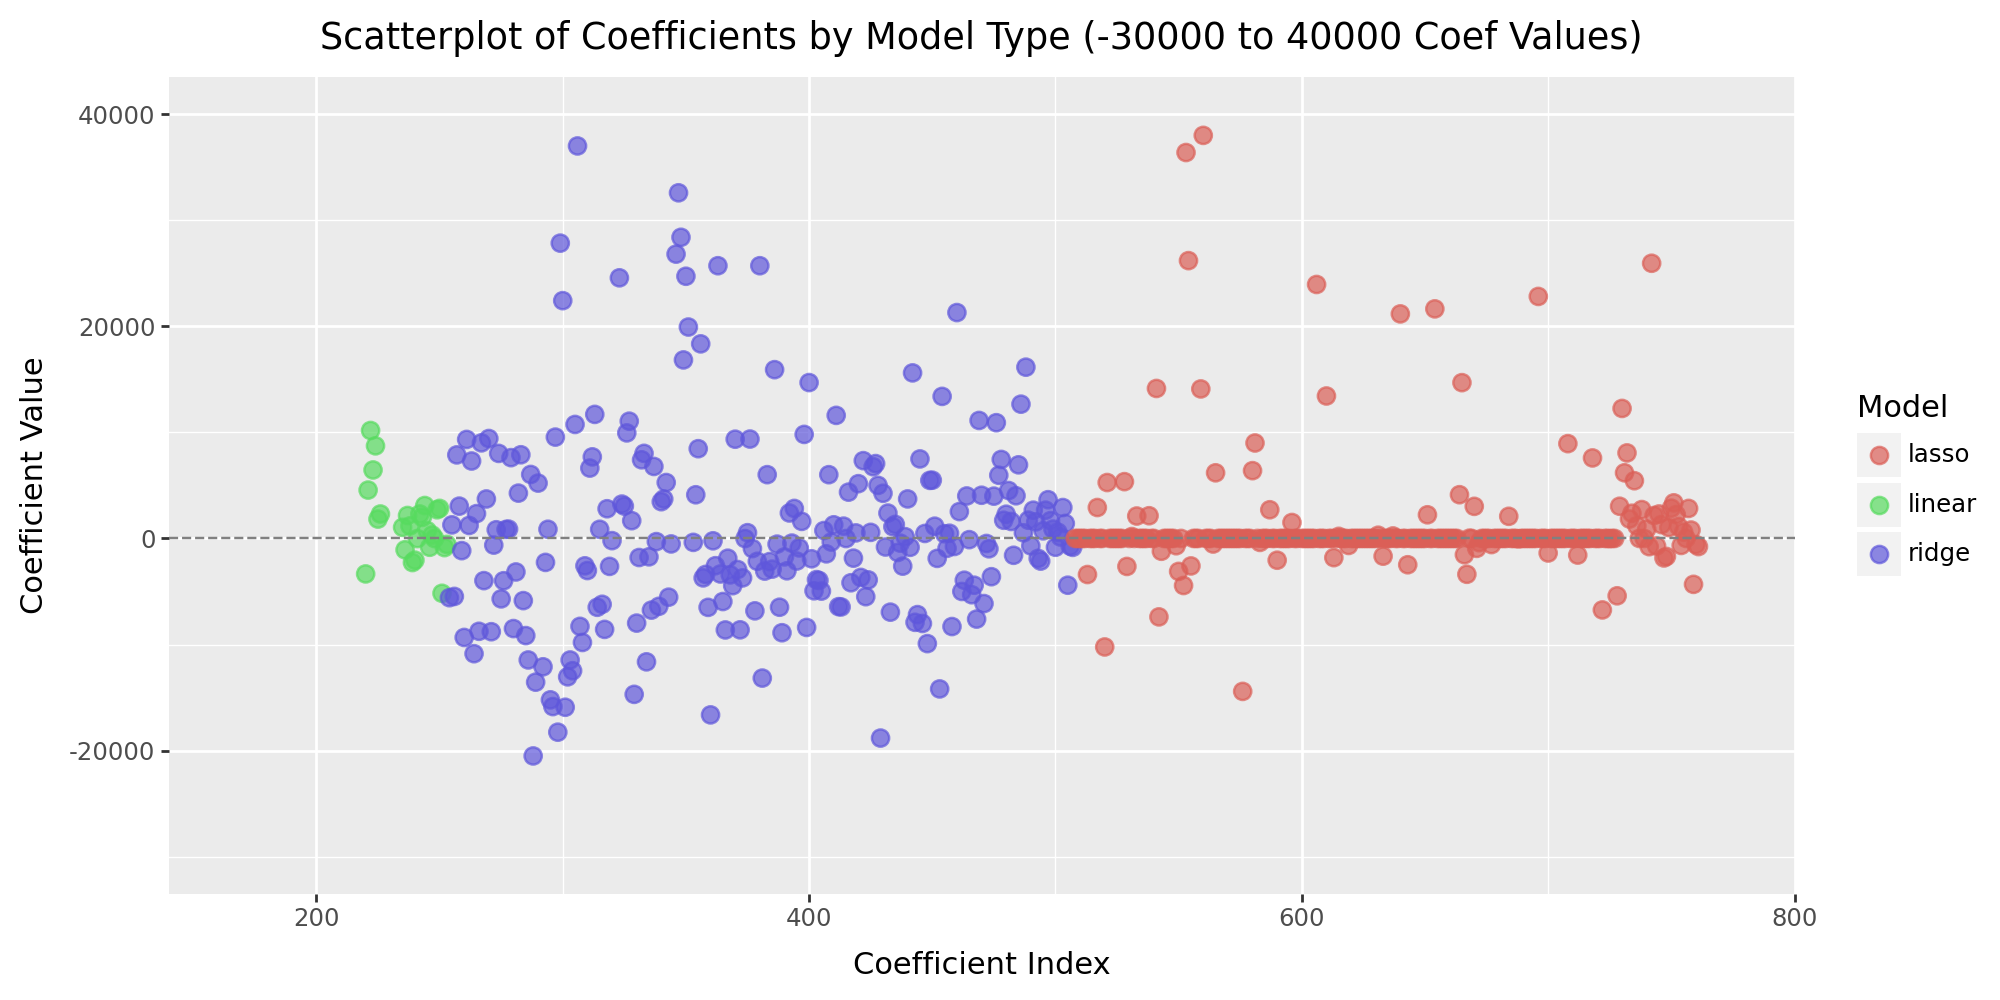

In [122]:
(
    ggplot(coefs_df, aes(x='Index', y='Coefficient', color='Model'))
    + geom_point(size=3, alpha=0.7)  # Scatter points for each coefficient
    + geom_hline(yintercept=0, linetype="dashed", color="gray")  # Add reference line at y=0
    + labs(title="Scatterplot of Coefficients by Model Type (-30000 to 40000 Coef Values)",
           y="Coefficient Value",
           x="Coefficient Index")
    + scale_y_continuous(limits=(-30000, 40000))
    + scale_x_continuous(limits=(170, 770))
    + theme(figure_size = (10,5))
)

C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 596 rows containing missing values.


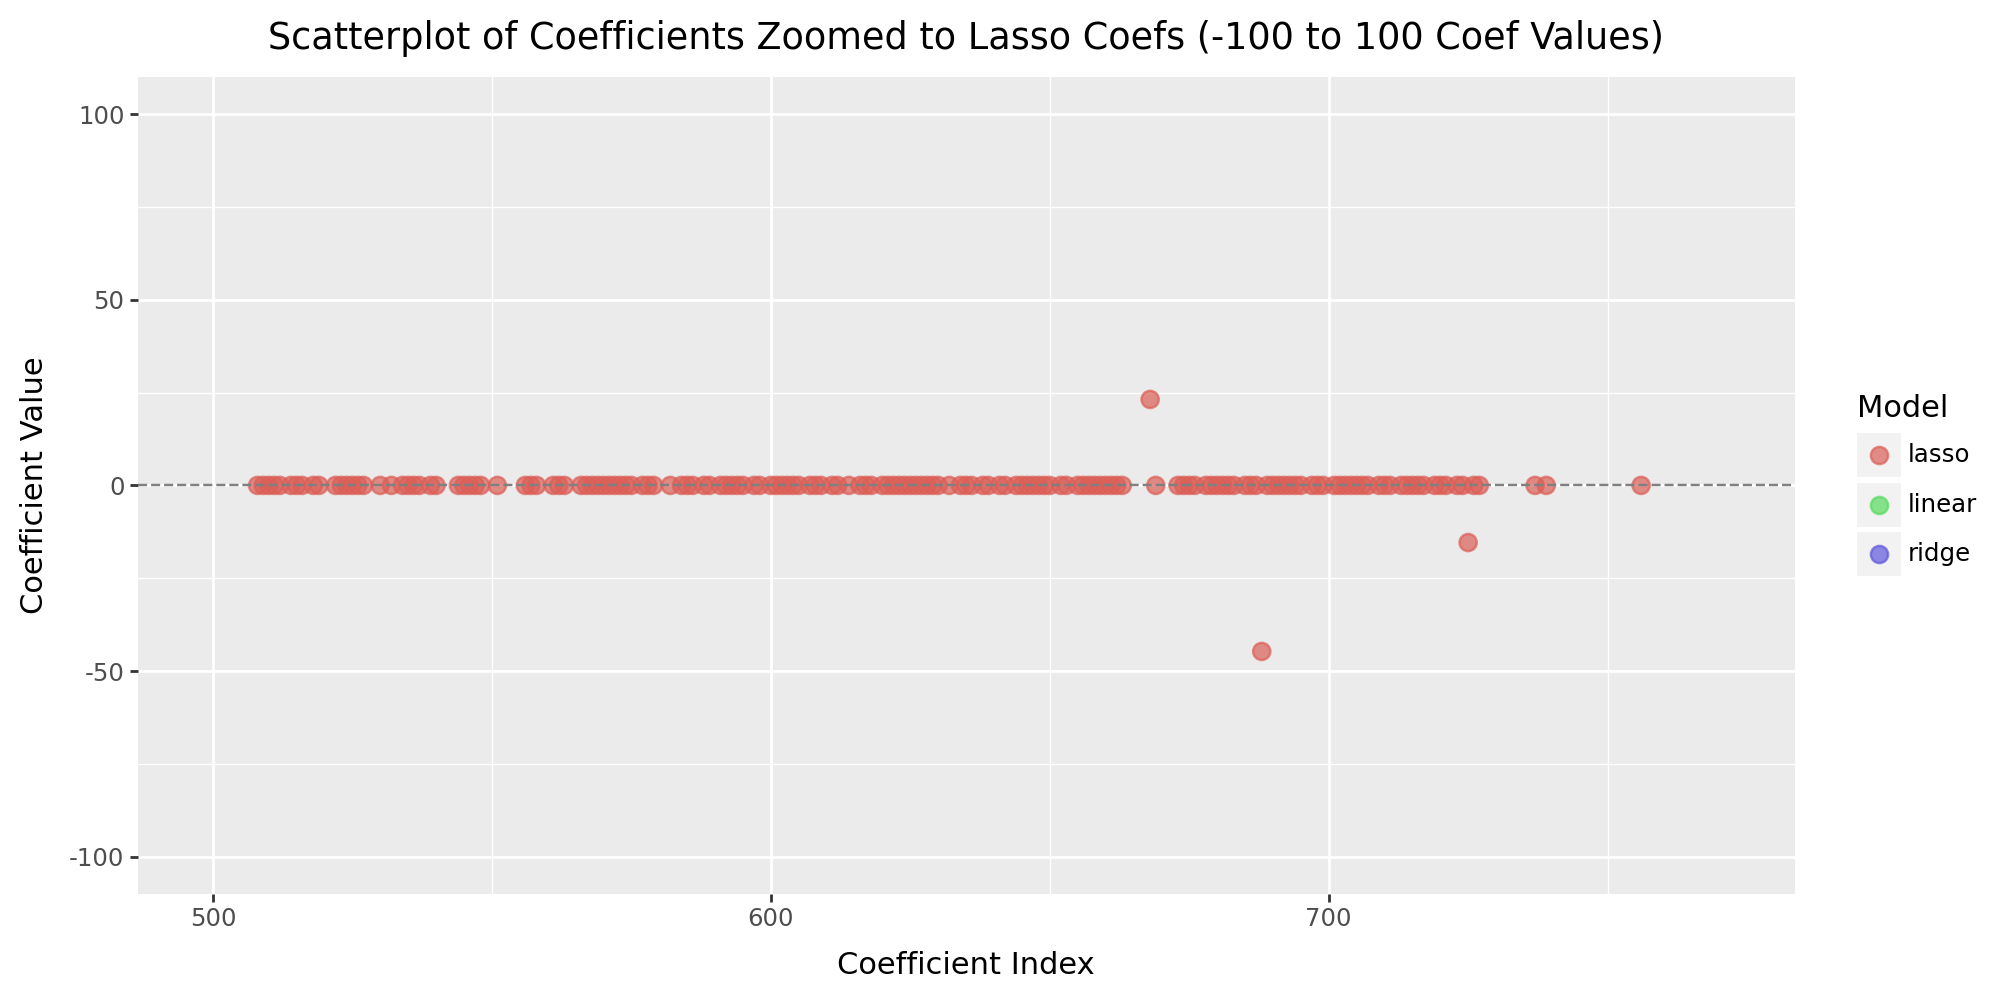

In [131]:
(
    ggplot(coefs_df, aes(x='Index', y='Coefficient', color='Model'))
    + geom_point(size=3, alpha=0.7)  # Scatter points for each coefficient
    + geom_hline(yintercept=0, linetype="dashed", color="gray")  # Add reference line at y=0
    + labs(title="Scatterplot of Coefficients Zoomed to Lasso Coefs (-100 to 100 Coef Values)",
           y="Coefficient Value",
           x="Coefficient Index")
    + scale_y_continuous(limits=(-100, 100))
    + scale_x_continuous(limits=(500, 770))
    + theme(figure_size = (10,5))
)

In [140]:
lasso_coefs_df = coefs_df[coefs_df["Model"] == "lasso"]

# Count non-zero and zero-valued coefficients
non_zero_count = (lasso_coefs_df["Coefficient"] != 0).sum()
zero_count = (lasso_coefs_df["Coefficient"] == 0).sum()
total_count = len(lasso_coefs_df)

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Non-zero Lasso Coefficients": [non_zero_count],
    "Zero-valued Lasso Coefficients": [zero_count],
    "Total Coefficients": [total_count]
})

summary_df = pd.DataFrame({
    "Count": [91, 163, 254]
}, index=["Non-zero Lasso Coefficients", "Zero-valued Lasso Coefficients", "Total Lasso Coefficients"])

summary_df.index.name = "Coefficient Type"

# Display the improved DataFrame
print(summary_df)

                                Count
Coefficient Type                     
Non-zero Lasso Coefficients        91
Zero-valued Lasso Coefficients    163
Total Lasso Coefficients          254


We can see that these three graphs of various zoom levels show that the lasso coefficients have the tightest range of values, from about -15000 to 40000, with the vast majority of coefficients being zero or near zero. This makes sense since the lasso coefficients can equal zero, and the lasso model is removing the predictors that do not contribute to increased predictive power. From the table above, we can see that there are 91 coefficients with alpha = 100 that the lasso model deems as non-zero coefficients, and therefore provide predictive power. 

### Part 4
Create an Elastic Net pipeline, and tune λ and α.

Fit your best model on the full Ames data, and compare the coefficients to Ridge and OLS.


In [143]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_4 = Pipeline(
  [("preprocessing", ct),
   ("elastic", ElasticNet())]
)

alphas = {'elastic__alpha': [0.0001, 0.001, 0.1, 1, 10]}

gscv = GridSearchCV(lr_pipeline_4, alphas, cv = 5, scoring='r2')

gscv_fitted = gscv.fit(X, y)

cv_results = gscv_fitted.cv_results_

results_df = pd.DataFrame({
    "alpha": [0.0001, 0.001, 0.1, 1, 10],
    "mean_r2": cv_results['mean_test_score']
})

print(results_df)

C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.412e+11, tolerance: 1.348e+09
C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.159e+11, tolerance: 1.474e+09
C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: Co

     alpha   mean_r2
0   0.0001  0.856556
1   0.0010  0.862155
2   0.1000  0.856987
3   1.0000  0.830700
4  10.0000  0.673239


C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.191e+11, tolerance: 1.793e+09


In [145]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_4 = Pipeline(
  [("preprocessing", ct),
   ("elastic", ElasticNet(l1_ratio=0.5))]
)

lambdas = {'elastic__l1_ratio': [0.1, 1, 10, 100, 1000]}

gscv = GridSearchCV(lr_pipeline_4, lambdas, cv = 5, scoring='r2')

gscv_fitted = gscv.fit(X, y)

cv_results = gscv_fitted.cv_results_

results_df = pd.DataFrame({
    "lambdas": [0.1, 1, 10, 100, 1000],
    "mean_r2": cv_results['mean_test_score']
})

print(results_df)

C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.323e+10, tolerance: 1.477e+09
C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most

   lambdas   mean_r2
0      0.1  0.815716
1      1.0  0.857152
2     10.0       NaN
3    100.0       NaN
4   1000.0       NaN


In [147]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_4 = Pipeline(
  [("preprocessing", ct),
   ("elastic", ElasticNet(alpha = 0.001, l1_ratio=1))]
)

lr_pipeline_4.fit(X, y)

elastic_coefs = lr_pipeline_4.named_steps["elastic"].coef_

print("Elastic coefficients:", elastic_coefs)

Elastic coefficients: [-4.94843770e+03  1.24668256e+03 -7.81274089e+03  7.56737702e+03
  3.47448697e+03 -1.32379554e+03 -2.09332376e+04  3.92414418e-09
 -1.61737583e+03  4.58901427e+03  7.04400887e+02 -1.78512839e+02
 -9.02147343e+03  5.43285551e+03 -1.11309612e+04  1.01947588e+02
  1.60726441e+04 -4.15294264e+03  1.32946961e+03  2.35467888e+02
  6.39561199e+03 -6.12891087e+03 -5.13188153e+03 -9.97476134e+01
 -3.88653221e+03  2.85956715e+03 -2.06785347e+04  3.25252465e+03
  1.00313810e+04  1.31391939e+04  2.25347785e+02 -5.25475542e+03
 -7.35410495e+03  1.06905985e+04 -1.46965863e+04 -8.29226783e+03
  1.17765620e+04  1.34069426e+05 -6.17929394e+03  1.21331614e+03
  7.11651768e+03 -1.11365234e+04 -1.11805653e+04  1.88209761e+04
 -1.43287668e+04  3.00916345e+04  2.43412392e+04 -1.02018847e+04
 -8.32743087e+03 -6.83515136e+03 -8.33896654e+03  1.51023300e+04
  4.21119018e+04 -5.07837885e+03 -8.28065568e+03 -8.20882308e+03
 -6.06336489e+03  1.98711377e+03  5.26114669e+02  8.37474849e+03
 -1

C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.910e+11, tolerance: 1.793e+09


In [148]:
combined_coefs = np.concatenate([lr_coefs, ridge_coefs, lasso_coefs, elastic_coefs])
model_type = ["linear"] * len(lr_coefs) + ["ridge"] * len(ridge_coefs) + ["lasso"] * len(lasso_coefs) + ["elastic"] * len(elastic_coefs)

coefs_df = pd.DataFrame({
    "Coefficient": combined_coefs,
    "Model": model_type
})

coefs_df['Index'] = np.arange(len(coefs_df))


print(coefs_df)

       Coefficient    Model  Index
0    -5.134241e+16   linear      0
1    -5.134241e+16   linear      1
2    -5.134241e+16   linear      2
3    -5.134241e+16   linear      3
4    -5.134241e+16   linear      4
...            ...      ...    ...
1011  2.670601e+03  elastic   1011
1012  2.776196e+03  elastic   1012
1013 -5.139703e+03  elastic   1013
1014 -7.748136e+02  elastic   1014
1015 -6.130694e+02  elastic   1015

[1016 rows x 3 columns]


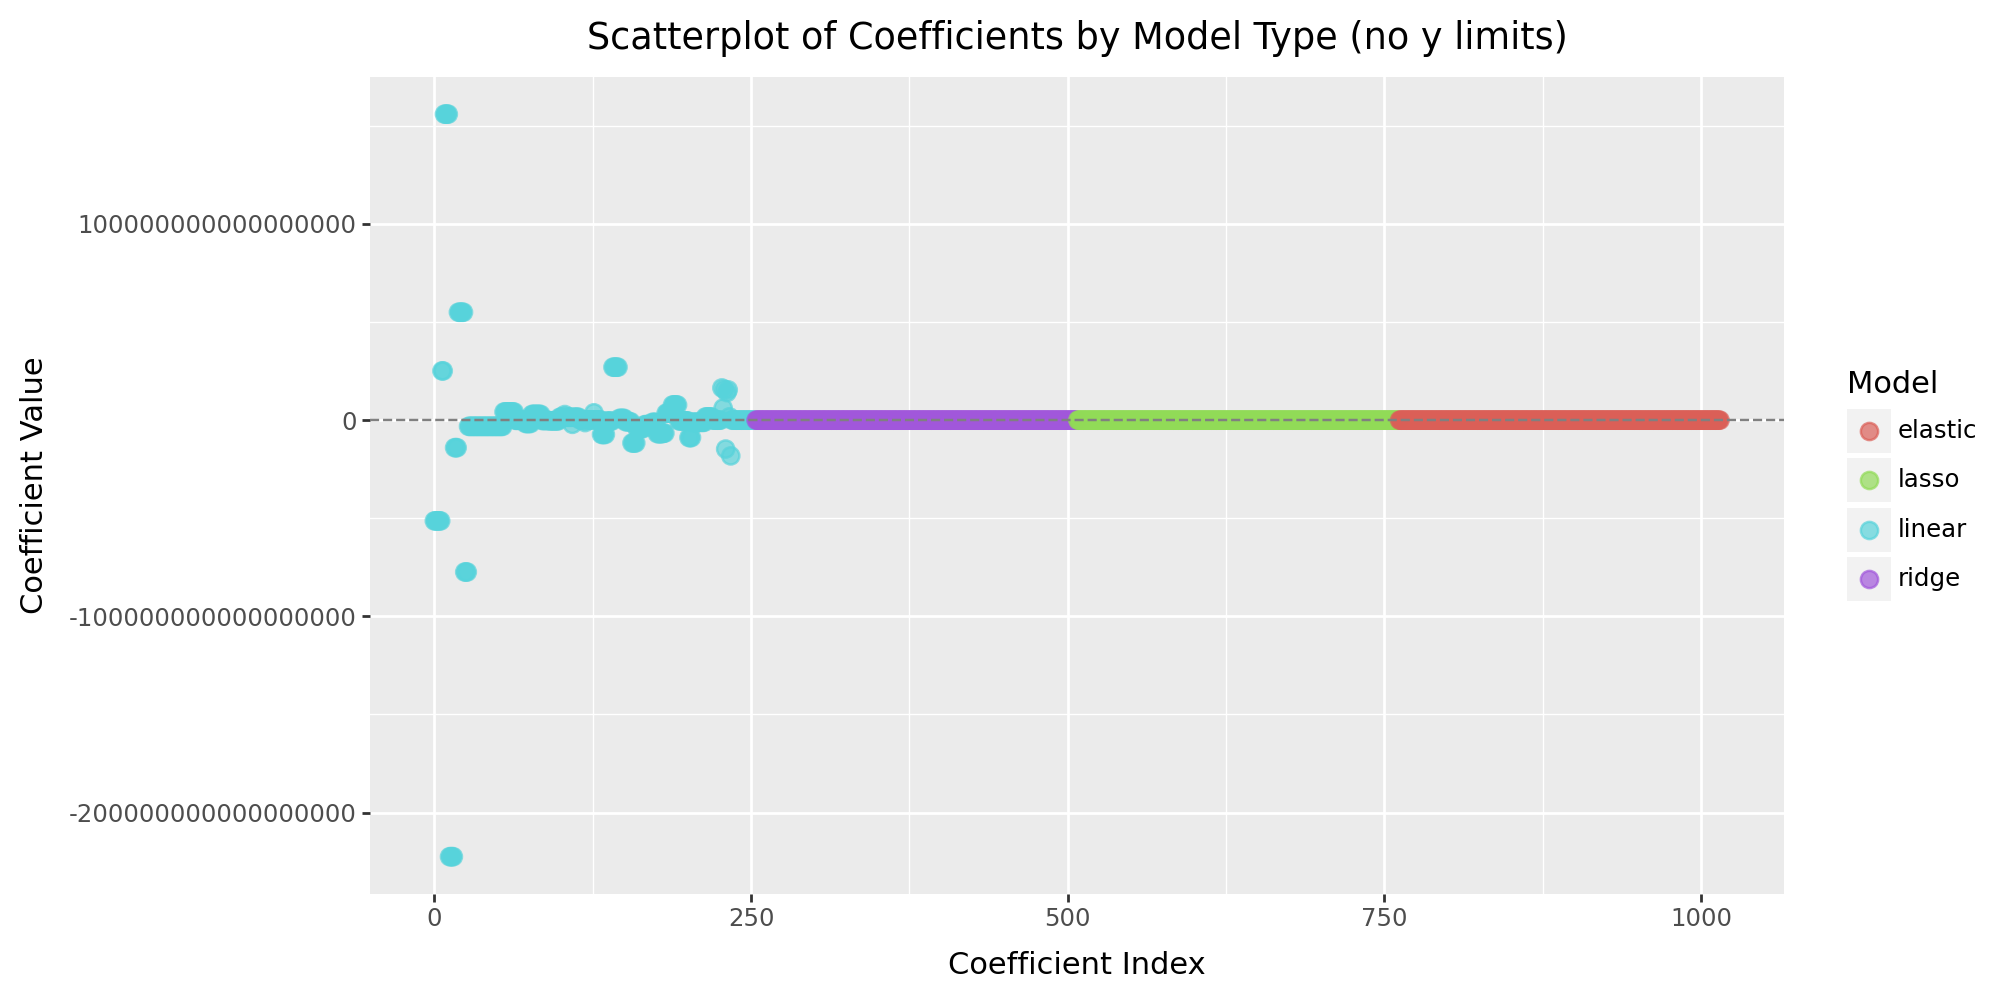

In [149]:
(
    ggplot(coefs_df, aes(x='Index', y='Coefficient', color='Model'))
    + geom_point(size=3, alpha=0.7)  # Scatter points for each coefficient
    + geom_hline(yintercept=0, linetype="dashed", color="gray")  # Add reference line at y=0
    + labs(title="Scatterplot of Coefficients by Model Type (no y limits)",
           y="Coefficient Value",
           x="Coefficient Index")
    + theme(figure_size = (10,5))
)

C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 255 rows containing missing values.


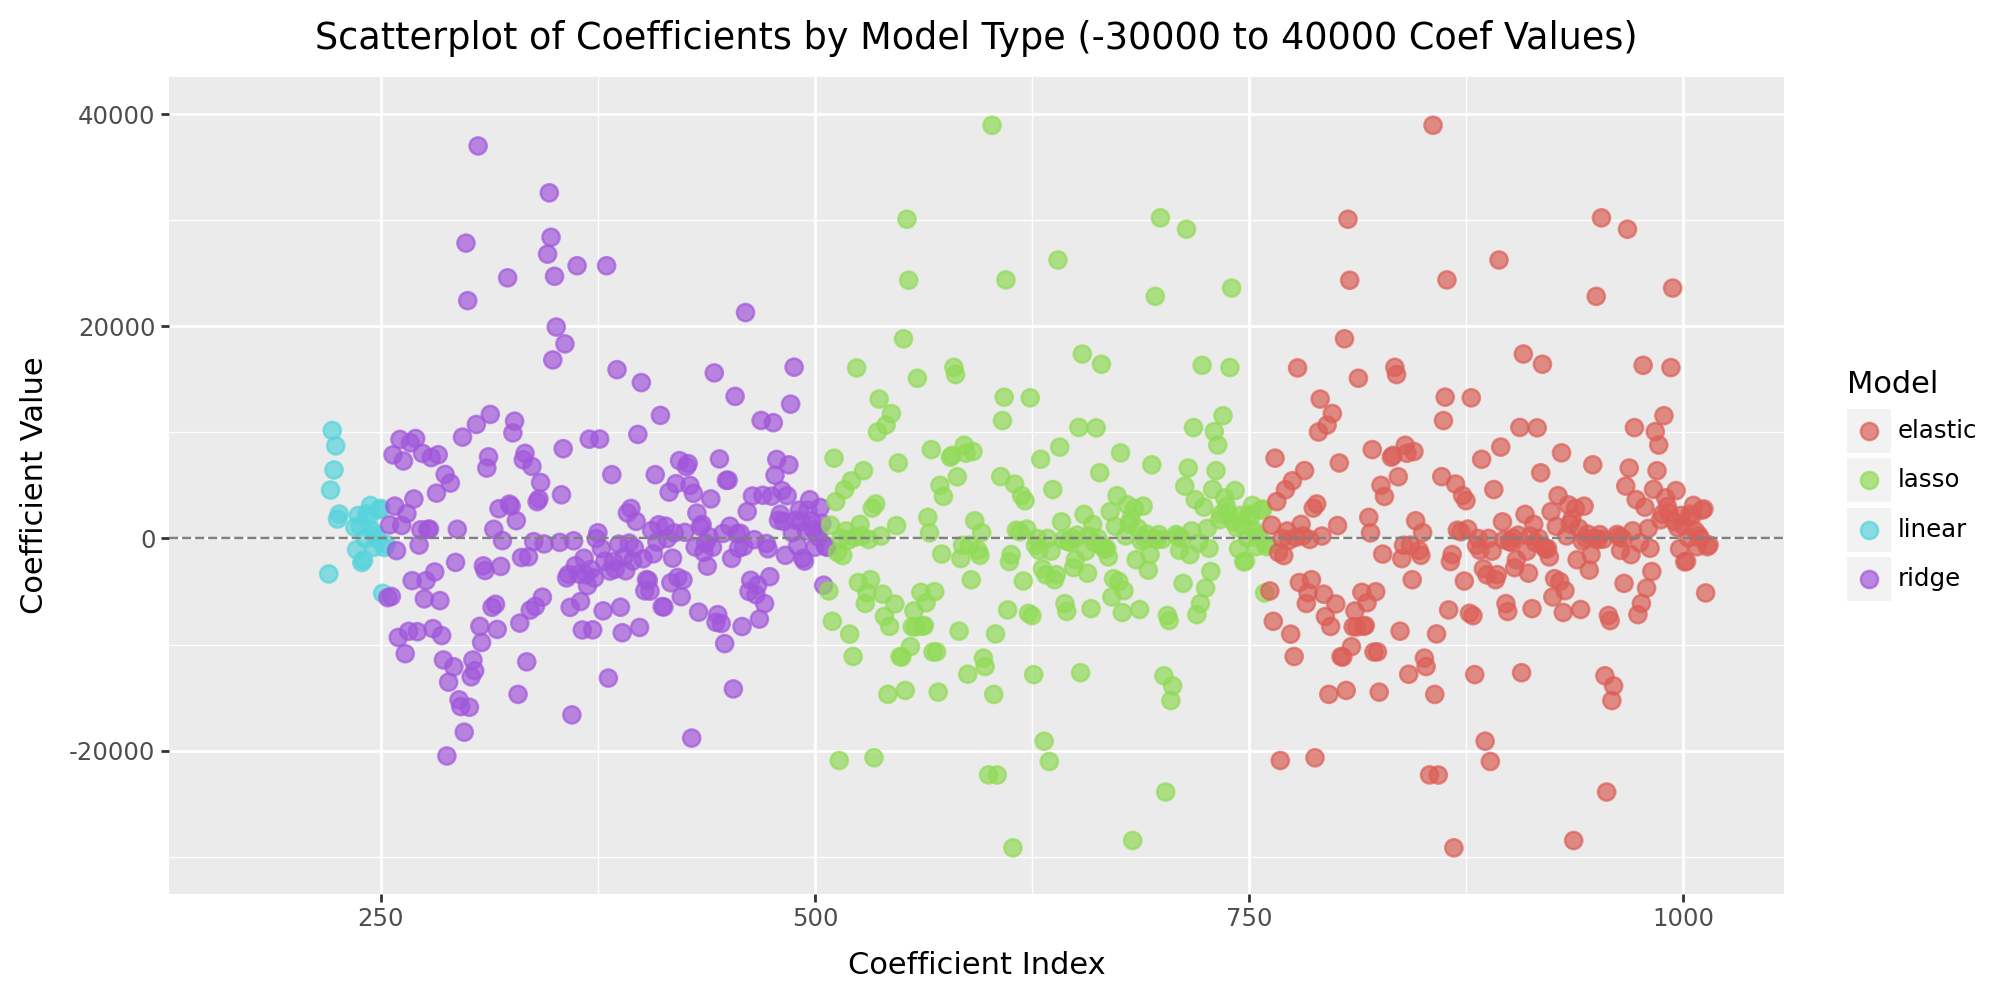

In [151]:
(
    ggplot(coefs_df, aes(x='Index', y='Coefficient', color='Model'))
    + geom_point(size=3, alpha=0.7)  # Scatter points for each coefficient
    + geom_hline(yintercept=0, linetype="dashed", color="gray")  # Add reference line at y=0
    + labs(title="Scatterplot of Coefficients by Model Type (-30000 to 40000 Coef Values)",
           y="Coefficient Value",
           x="Coefficient Index")
    + scale_y_continuous(limits=(-30000, 40000))
    + scale_x_continuous(limits=(170, 1016))
    + theme(figure_size = (10,5))
)

We can see that the lasso and elastic models have the same coefficients because the lasso model is the best model. Since lambda = 1 had the highest R-squared for the elastic model, it prefers the lasso model over the ridge model since there were many coefficients with a value of zero (no predictive power), compared to the ridge model that had unnecessary coefficients that leaned more towards overfitting as opposed to a balance between over and underfitting.